# Notebook 5: Random Forest

**Random Forest** is a Supervised Machine Learning Algorithm that is used widely in **Classification** and **Regression problems**. It builds **decision trees** on different samples and takes their majority vote for classification and average in case of regression.

![](docs/RF.png)

This notebook will train the user data on spotify using the Random Forest model. To get a better understanding of what the data looks like, refer to Notebook 1

In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [32]:
data = pd.read_csv('processed_data.csv')

In [33]:
cols = list(data.columns)
cols.pop(0)
cols.remove('target')

In [34]:
X = data[cols]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [35]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred=model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])

<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

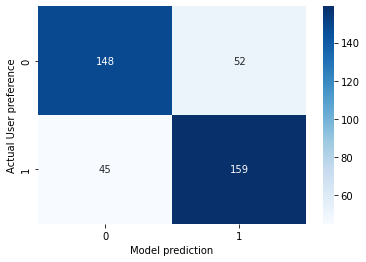

In [37]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       200
           1       0.75      0.78      0.77       204

    accuracy                           0.76       404
   macro avg       0.76      0.76      0.76       404
weighted avg       0.76      0.76      0.76       404



To determine the hyperparmeters regarding Random Forest we use : get_params()

In [62]:
rf = RandomForestClassifier(random_state = 0)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


### Hyperparameter Tuning

In this section we will try to find the best model by changing the hyperparameters

#### RandomizedSearchCV

In this case we chose to use **RandomizedSearchCV** instead of **GridSearchCV** because it's faster

In [63]:
param_grid = {'n_estimators':np.arange(185,500,20),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [7, 9, 11, 15],
              'max_samples': [0.3, 0.5, 0.8],
             'random_state': [0]}

model = RSCV(rf, param_grid, n_iter = 15, cv=3 , verbose=1).fit(X_train, y_train)
model = model.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

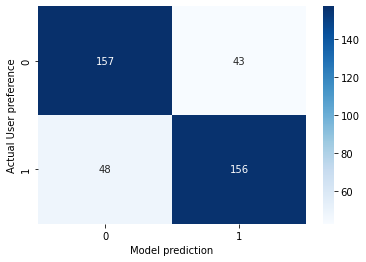

In [58]:
y_pred=model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       200
           1       0.78      0.76      0.77       204

    accuracy                           0.77       404
   macro avg       0.77      0.77      0.77       404
weighted avg       0.77      0.77      0.77       404



In [60]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 11, 'max_features': 0.4, 'max_leaf_nodes': None, 'max_samples': 0.8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 205, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
